In [1]:
import gymnasium
import os
import shutil
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torch
from src.agents import A2C_Categorical_Action_V3
from src.utils import plot_rewards
from src.networks import CriticFunction, ActorFunction_Categorical

### Environment

In [4]:
env = gymnasium.make('LunarLander-v2')

In [7]:
env_name = 'lunar_lander'
lr = 0.001

In [8]:
a2c_agent = A2C_Categorical_Action_V3(env, env_name, ActorFunction_Categorical, CriticFunction, 
                                      lr_actor = lr, lr_value_critic = lr, 
                                      discount_factor = 0.99, convergence_value = 200, convergence_len = 20)

In [9]:
folder_path = f'logs/{env_name}'
if os.path.exists(folder_path):
    # Remove the folder
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' deleted successfully.")
else:
    print(f"Folder '{folder_path}' does not exist.")

Folder 'logs/assignment3_part3_lunar_lander' deleted successfully.


In [10]:
writer = SummaryWriter(log_dir=f'logs/{env_name}')

In [11]:
a2c_agent.train(10000, writer)

Training Episode::   0%|          | 0/10000 [00:00<?, ?it/s]

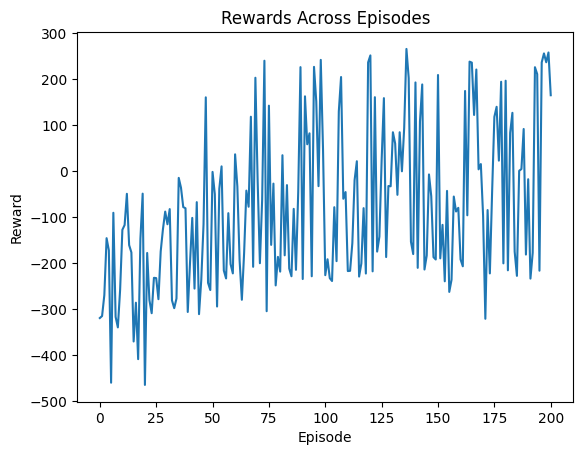

In [12]:
plot_rewards(a2c_agent.reward_across_episdoes)

### Evaluation

In [13]:
eval_rewards = a2c_agent.evaluate(100)

Evaluation::   0%|          | 0/100 [00:00<?, ?it/s]

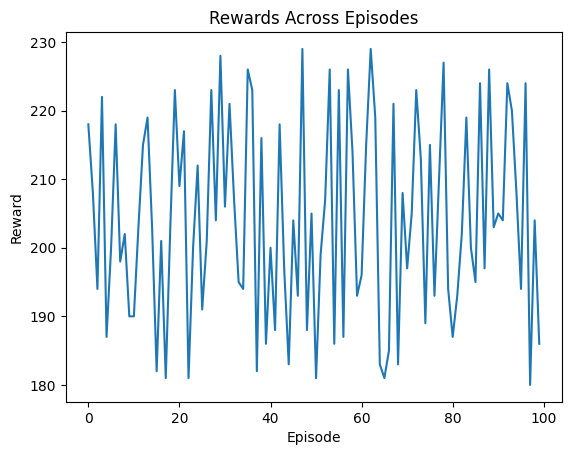

In [30]:
plot_rewards(eval_rewards)